<a href="https://colab.research.google.com/github/geadalfa/PrediksiWarna/blob/main/Randomforest_NN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.dates as dates
from datetime import datetime
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt #untuk menampilkan gambar/grafik
import numpy as np #untuk operasi vektor dan matriks dengan mengolah array dan array multidimensi
import cv2 #library OpenCV untuk memanipulasi gambar
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os #untuk dapat berinteraksi dengan sist operasi
pd.set_option('display.max_rows', 100)

%matplotlib inline

# **Menurut orang India semakin banyak kelas maka akurasi akan turun**
https://discuss.analyticsvidhya.com/t/maximum-no-of-classes-in-a-multi-classification-problem/67147/2

Solusi dengan data training yg hanya 1200 saja adalah kelasnya <10

Ceritanya manipulasi data aja cuy

#Random Forest Model

In [3]:
dataset = pd.read_excel('/content/drive/MyDrive/2017-2018-2019-2020.xlsx')
dataset

,Color,hsv,hue,saturation,brightness,rgb,minggu ke,Ex. Factory Date,Model Long Descriptions,PO Number,Total PO Order Qty,kelas,kelas_2,Date,Year,Month,Season
0,CREAM,"(43.99999999999994, 6.329113924050635, 92.9411...",44.000000,6.329114,92.941176,[203 198 199],1,2017-07-09,ALTO VST-POLY FILL-VEST,4700613285,3798,3,3.1,2017-07-09,2017,7,2
1,NAVY,"(194.9999999999999, 1.5686274509803977, 100.0)",195.000000,1.568627,100.000000,[81 42 28],2,2017-07-12,ALTO VST-POLY FILL-VEST,4700613285,9996,11,11.2,2017-07-12,2017,7,2
2,OLIVE,"(43.75, 54.54545454545454, 34.509803921568626)",43.750000,54.545455,34.509804,[187 112 60],3,2017-07-23,ALTO VST-POLY FILL-VEST,4700613286,3798,3,3.1,2017-07-23,2017,7,2
3,BLACK,"(289.99999999999994, 9.836065573770492, 23.921...",290.000000,9.836066,23.921569,[56 52 51],4,2017-07-31,FAIRWAY JKT-SYNTHETIC-JACKET,4700626516,514,17,17.1,2017-07-31,2017,7,2
4,BLACK,"(289.99999999999994, 9.836065573770492, 23.921...",290.000000,9.836066,23.921569,[56 52 51],1,2017-08-01,FAIRWAY JKT-SYNTHETIC-JACKET,4700626517,10222,17,17.1,2017-08-01,2017,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,NAVY,"(194.9999999999999, 1.5686274509803977, 100.0)",195.000000,1.568627,100.000000,[81 42 28],4,2020-11-29,AMHERST JKT-LINED-JACKET,4701196546,3084,11,11.2,2020-11-29,2020,11,3
164,NAVY,"(194.9999999999999, 1.5686274509803977, 100.0)",195.000000,1.568627,100.000000,[81 42 28],1,2020-12-03,AMHERST JKT-LINED-JACKET,4701196548,3308,11,11.2,2020-12-03,2020,12,4
165,BLUE,"(225.88235294117646, 73.91304347826086, 36.078...",225.882353,73.913043,36.078431,[36 24 76],2,2020-12-17,PAR WB-UNLINED-JACKET,4701212938,416,13,13.2,2020-12-17,2020,12,4
166,MULTI,"(193.1764705882353, 100.0, 100.0)",193.176471,100.000000,100.000000,[65 41 41],3,2020-12-24,RACING JKT-LINED-JACKET,4701214414,417,11,11.2,2020-12-24,2020,12,4


# Visualisasi

In [4]:
th2017 = pd.DataFrame(dataset, columns=['Color', 'Total PO  Order Qty', 'minggu ke', 'Ex. Factory Date', 'Year'])
th2017 = th2017[th2017.Year == 2017]
th2017

,Color,Total PO Order Qty,minggu ke,Ex. Factory Date,Year
0,CREAM,3798,1,2017-07-09,2017
1,NAVY,9996,2,2017-07-12,2017
2,OLIVE,3798,3,2017-07-23,2017
3,BLACK,514,4,2017-07-31,2017
4,BLACK,10222,1,2017-08-01,2017
5,NAVY,5044,2,2017-08-10,2017
6,RED,2000,3,2017-08-17,2017
7,SAPPHIRE STAR,1900,4,2017-08-27,2017
8,BLACK,5384,1,2017-09-01,2017
9,NAVY,4577,2,2017-09-10,2017


In [5]:
navy = th2017[th2017.Color == 'NAVY']
navy

,Color,Total PO Order Qty,minggu ke,Ex. Factory Date,Year
1,NAVY,9996,2,2017-07-12,2017
5,NAVY,5044,2,2017-08-10,2017
9,NAVY,4577,2,2017-09-10,2017
12,NAVY,545,1,2017-10-02,2017
15,NAVY,1060,4,2017-10-27,2017
19,NAVY,6355,4,2017-11-28,2017
20,NAVY,6342,1,2017-12-05,2017


In [6]:
navy.dtypes

Color                          object
Total PO  Order Qty             int64
minggu ke                       int64
Ex. Factory Date       datetime64[ns]
Year                            int64
dtype: object

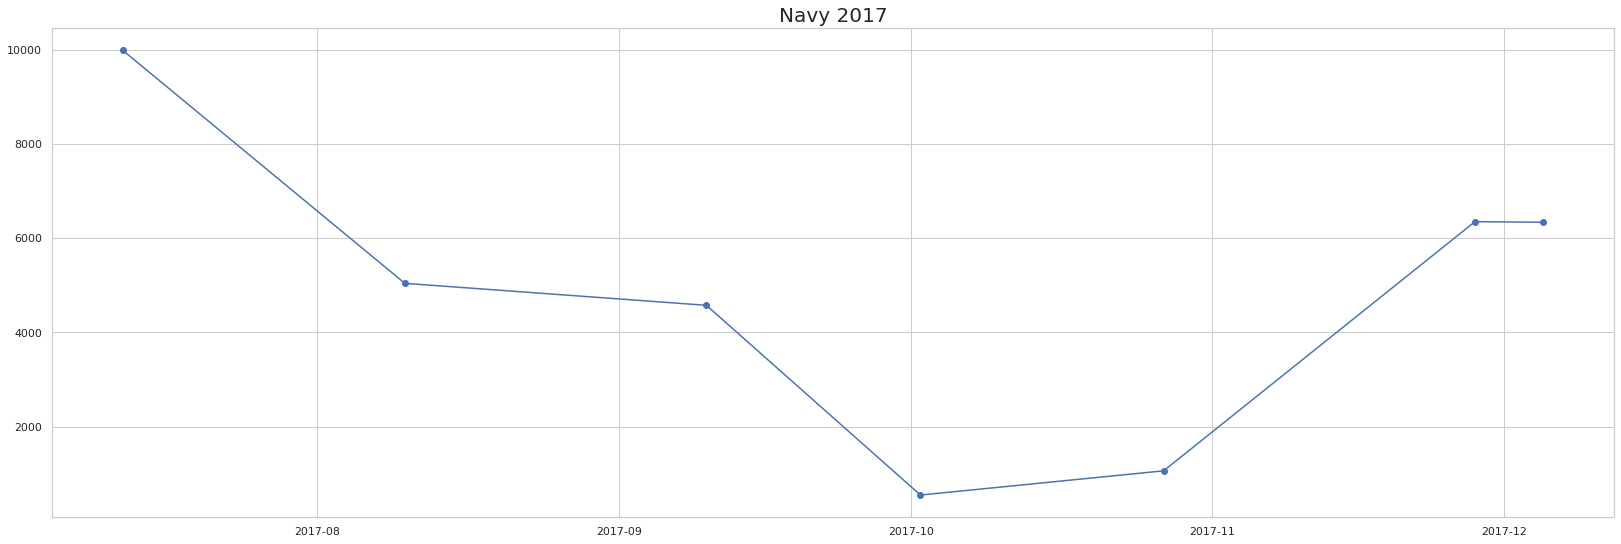

In [7]:
import seaborn as sns
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

plt.title('Navy 2017', fontsize=20)
plt.plot(navy['Ex. Factory Date'], navy['Total PO  Order Qty'])
plt.scatter(navy['Ex. Factory Date'], navy['Total PO  Order Qty'])

In [8]:
th2018 = pd.DataFrame(dataset, columns=['Color', 'Total PO  Order Qty', 'minggu ke', 'Ex. Factory Date', 'Year'])
th2018 = th2018[th2018.Year == 2018]
#th2018

In [9]:
navy2 = th2018[th2018.Color == 'NAVY']
navy2

,Color,Total PO Order Qty,minggu ke,Ex. Factory Date,Year
27,NAVY,8898,4,2018-01-28,2018
29,NAVY,3304,2,2018-02-11,2018
31,NAVY,255,4,2018-02-25,2018
33,NAVY,5525,2,2018-03-13,2018
37,NAVY,2258,2,2018-04-11,2018
42,NAVY,8413,3,2018-05-23,2018
45,NAVY,24389,2,2018-06-11,2018
48,NAVY,30,1,2018-07-01,2018
49,NAVY,130,2,2018-07-13,2018
50,NAVY,254,3,2018-07-24,2018


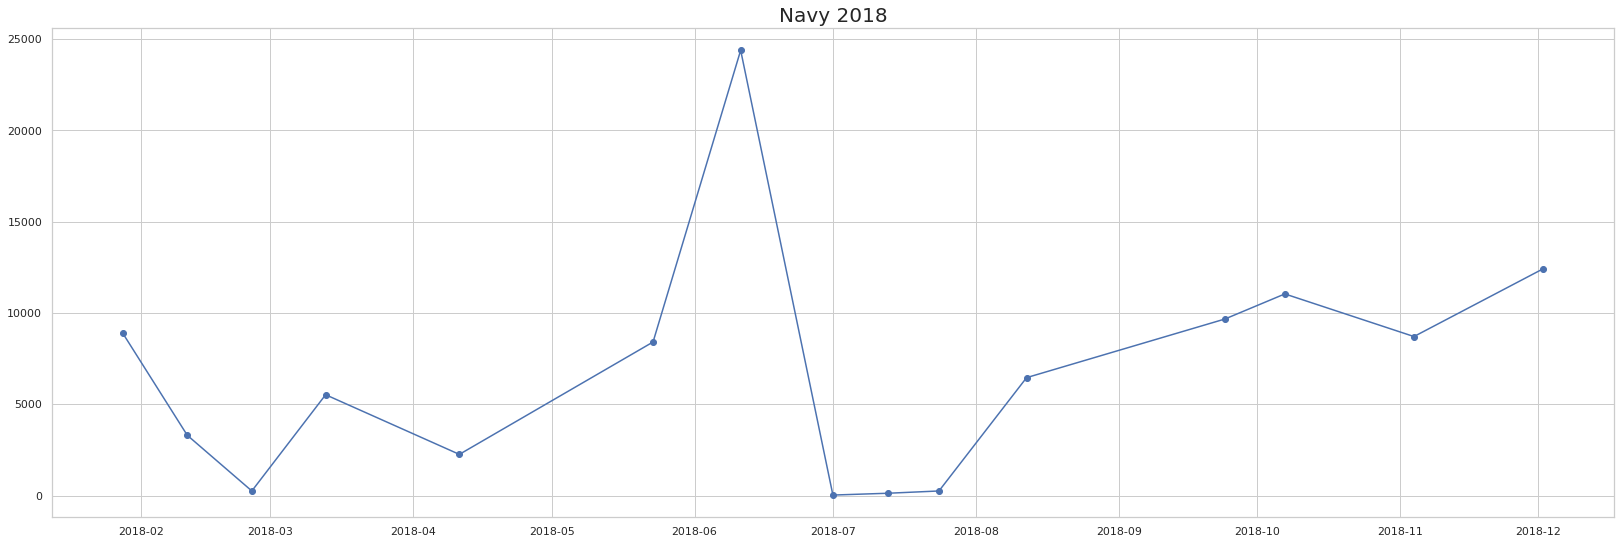

In [10]:
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

plt.title('Navy 2018', fontsize=20)
plt.plot(navy2['Ex. Factory Date'], navy2['Total PO  Order Qty'])
plt.scatter(navy2['Ex. Factory Date'], navy2['Total PO  Order Qty'])

In [11]:
th2019 = pd.DataFrame(dataset, columns=['Color', 'Total PO  Order Qty', 'minggu ke', 'Ex. Factory Date', 'Year'])
th2019 = th2019[th2019.Year == 2019]
#th2019

In [12]:
navy3 = th2019[th2019.Color == 'NAVY']
navy3

,Color,Total PO Order Qty,minggu ke,Ex. Factory Date,Year
74,NAVY,1988,3,2019-01-23,2019
76,NAVY,413,1,2019-02-05,2019
78,NAVY,521,3,2019-02-21,2019
81,NAVY,13117,2,2019-03-12,2019
84,NAVY,22523,1,2019-04-07,2019
89,NAVY,12984,2,2019-05-15,2019
94,NAVY,11150,3,2019-06-24,2019
97,NAVY,8863,2,2019-07-11,2019
100,NAVY,6634,1,2019-08-04,2019
107,NAVY,9593,4,2019-09-29,2019


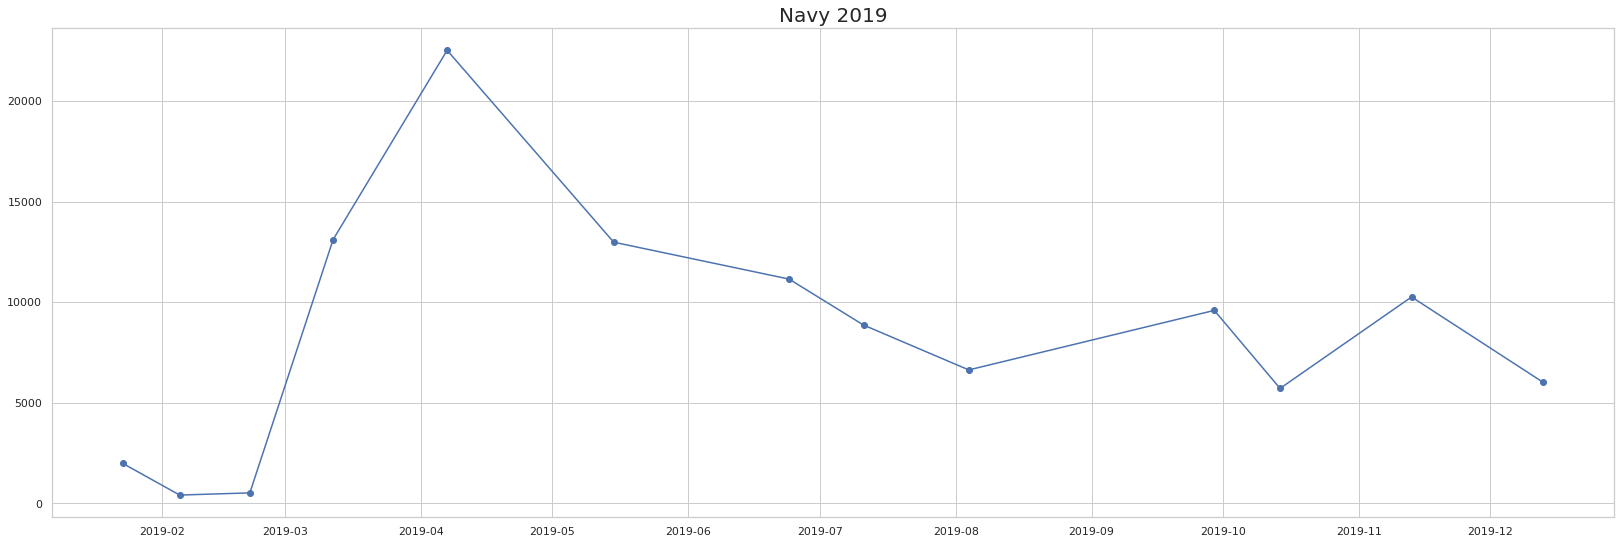

In [13]:
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

plt.title('Navy 2019', fontsize=20)
plt.plot(navy3['Ex. Factory Date'], navy3['Total PO  Order Qty'])
plt.scatter(navy3['Ex. Factory Date'], navy3['Total PO  Order Qty'])

In [14]:
th2020 = pd.DataFrame(dataset, columns=['Color', 'Total PO  Order Qty', 'minggu ke', 'Ex. Factory Date', 'Year'])
th2020 = th2020[th2020.Year == 2020]
#th2020

In [15]:
navy4 = th2020[th2020.Color == 'NAVY']
navy4

,Color,Total PO Order Qty,minggu ke,Ex. Factory Date,Year
121,NAVY,5130,2,2020-01-11,2020
125,NAVY,6766,2,2020-02-12,2020
130,NAVY,1985,3,2020-03-21,2020
135,NAVY,4800,4,2020-04-28,2020
138,NAVY,11471,3,2020-05-23,2020
143,NAVY,7213,4,2020-06-27,2020
146,NAVY,10240,3,2020-07-25,2020
150,NAVY,13109,3,2020-08-24,2020
152,NAVY,8471,1,2020-09-06,2020
156,NAVY,5376,1,2020-10-04,2020


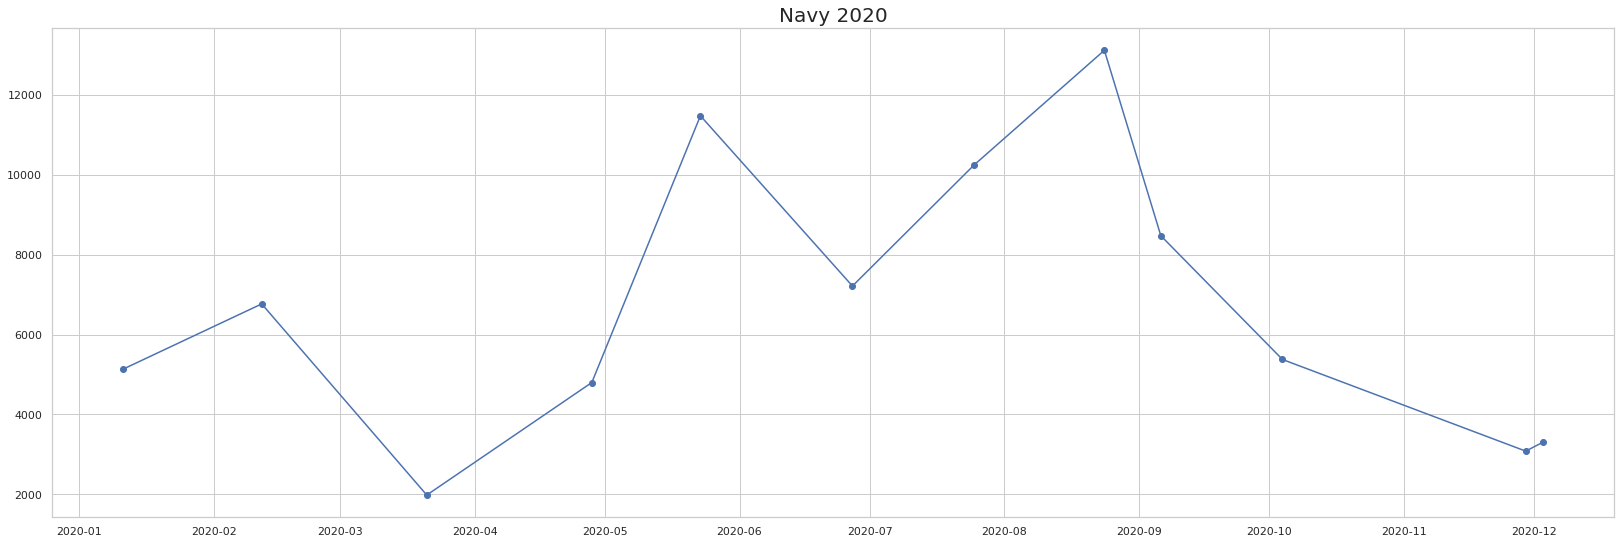

In [16]:
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

plt.title('Navy 2020', fontsize=20)
plt.plot(navy4['Ex. Factory Date'], navy4['Total PO  Order Qty'])
plt.scatter(navy4['Ex. Factory Date'], navy4['Total PO  Order Qty'])

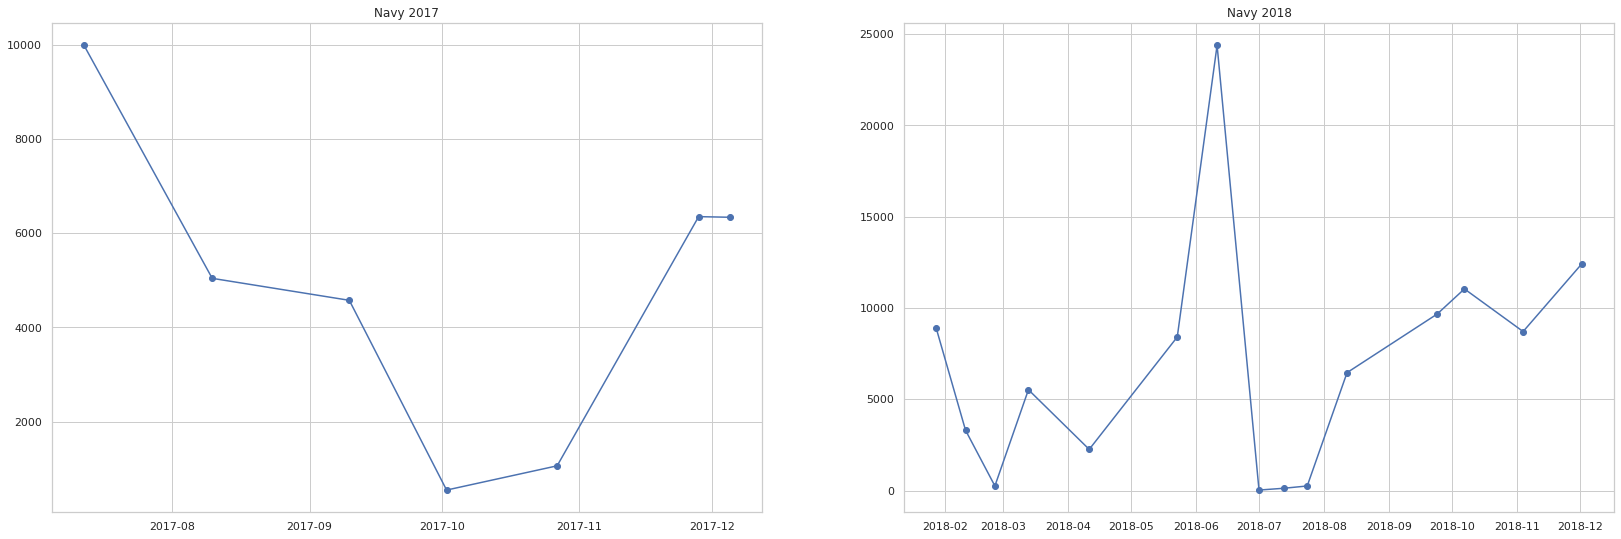

In [17]:
# 1 : 2
# 1 : 3
# 1 : 4
sns.set(style="whitegrid")
fig = plt.figure(figsize=(28, 9))
x = navy['Ex. Factory Date']
y = navy['Total PO  Order Qty']

x2 = navy2['Ex. Factory Date']
y2 = navy2['Total PO  Order Qty']

x3 = navy3['Ex. Factory Date']
y3 = navy3['Total PO  Order Qty']

x4 = navy4['Ex. Factory Date']
y4 = navy4['Total PO  Order Qty']

# Adds subplot on position 1
ax = fig.add_subplot(121)
# Adds subplot on position 2
ax2 = fig.add_subplot(122)

ax.title.set_text('Navy 2017')
ax.plot(x, y)
ax.scatter(x, y)

ax2.title.set_text('Navy 2018')
ax2.plot(x2, y2)
ax2.scatter(x2, y2)

plt.show()

# 2 : 3
# 2 : 4

# 3 : 4

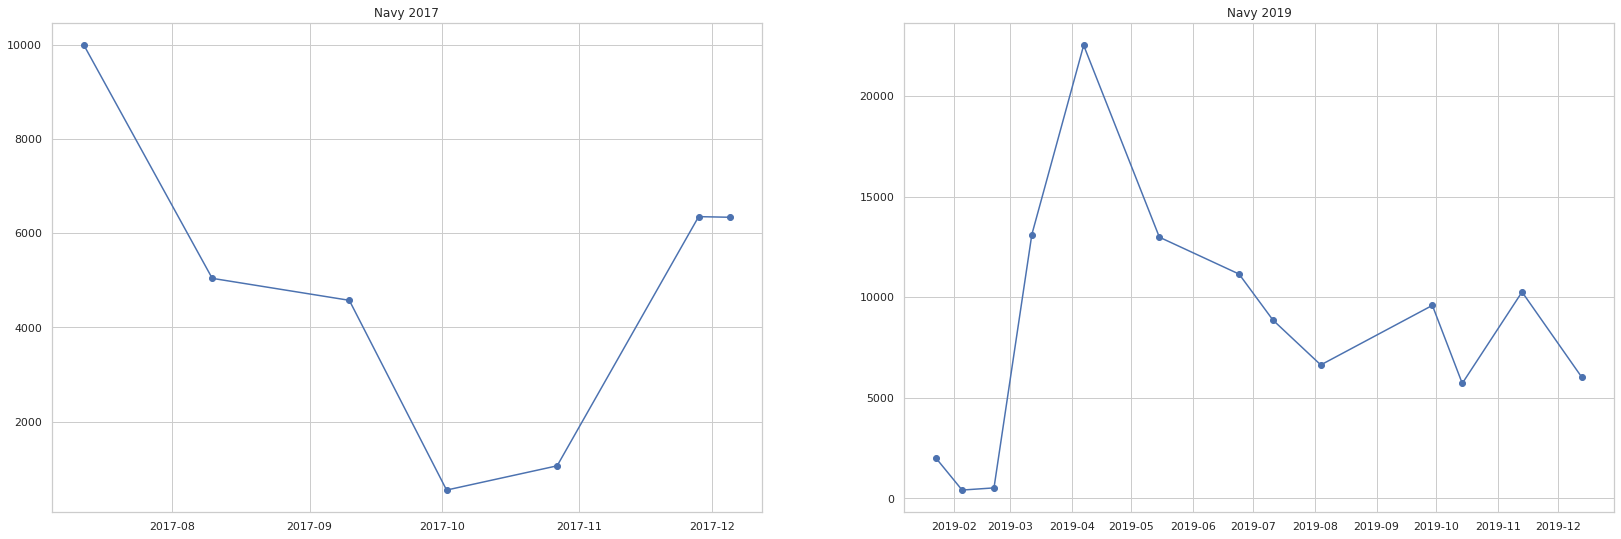

In [18]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(28, 9))
ax3 = fig.add_subplot(121)
ax4 = fig.add_subplot(122)

x3 = navy3['Ex. Factory Date']
y3 = navy3['Total PO  Order Qty']

ax3.title.set_text('Navy 2017')
ax3.plot(x, y)
ax3.scatter(x, y)

ax4.title.set_text('Navy 2019')
ax4.plot(x3, y3)
ax4.scatter(x3, y3)


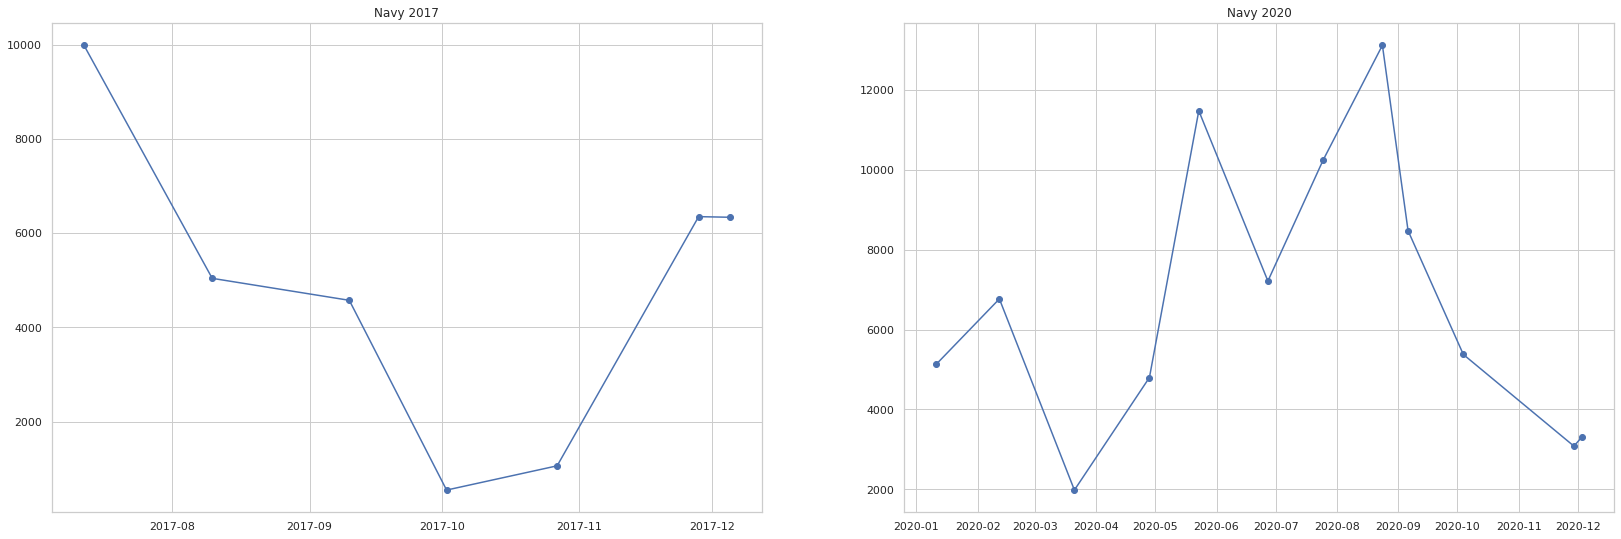

In [19]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(28, 9))
ax5 = fig.add_subplot(121)
ax6 = fig.add_subplot(122)

x4 = navy4['Ex. Factory Date']
y4 = navy4['Total PO  Order Qty']

ax5.title.set_text('Navy 2017')
ax5.plot(x, y)
ax5.scatter(x, y)

ax6.title.set_text('Navy 2020')
ax6.plot(x4, y4)
ax6.scatter(x4, y4)

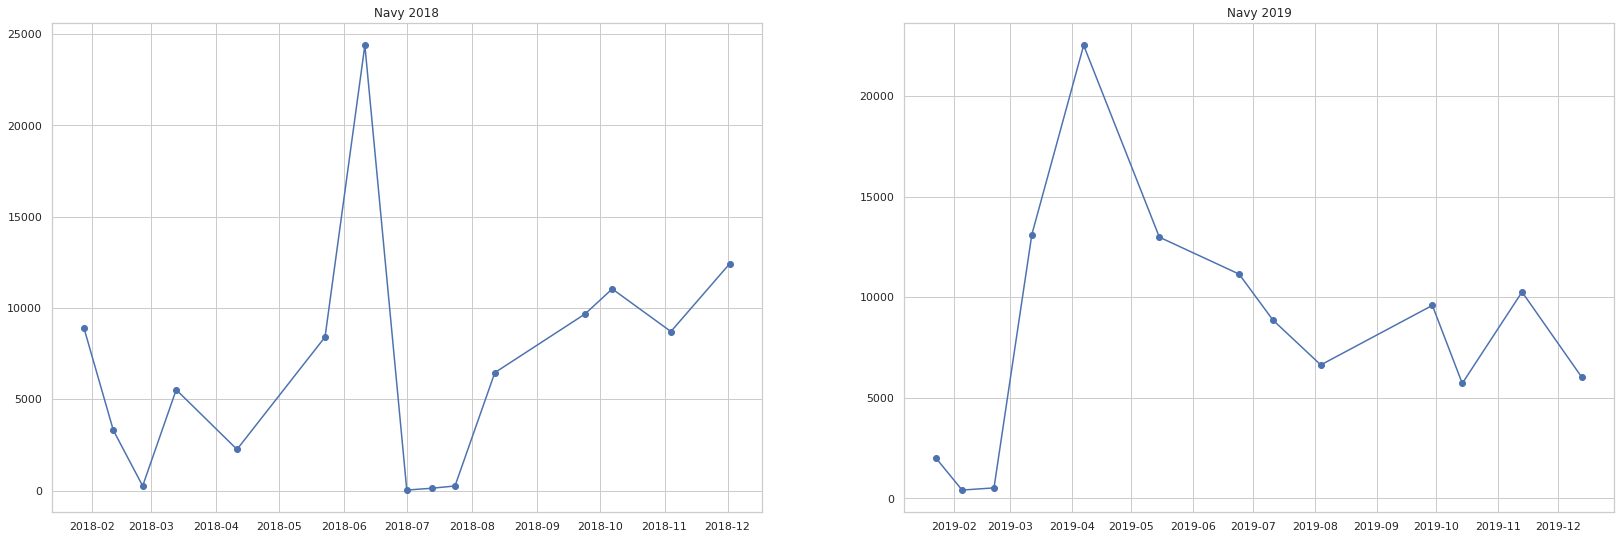

In [20]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(28, 9))
ax7 = fig.add_subplot(121)
ax8 = fig.add_subplot(122)

ax7.title.set_text('Navy 2018')
ax7.plot(x2, y2)
ax7.scatter(x2, y2)

ax8.title.set_text('Navy 2019')
ax8.plot(x3, y3)
ax8.scatter(x3, y3)

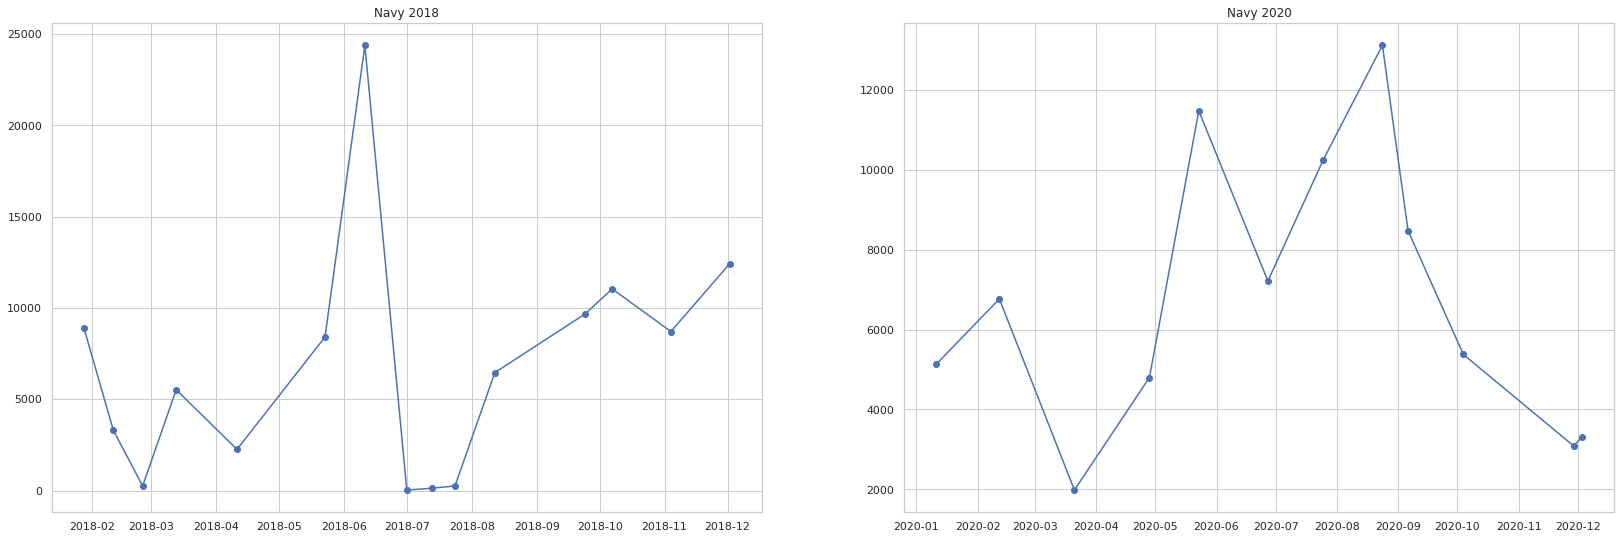

In [21]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(28, 9))
ax9 = fig.add_subplot(121)
ax10 = fig.add_subplot(122)

ax9.title.set_text('Navy 2018')
ax9.plot(x2, y2)
ax9.scatter(x2, y2)

ax10.title.set_text('Navy 2020')
ax10.plot(x4, y4)
ax10.scatter(x4, y4)

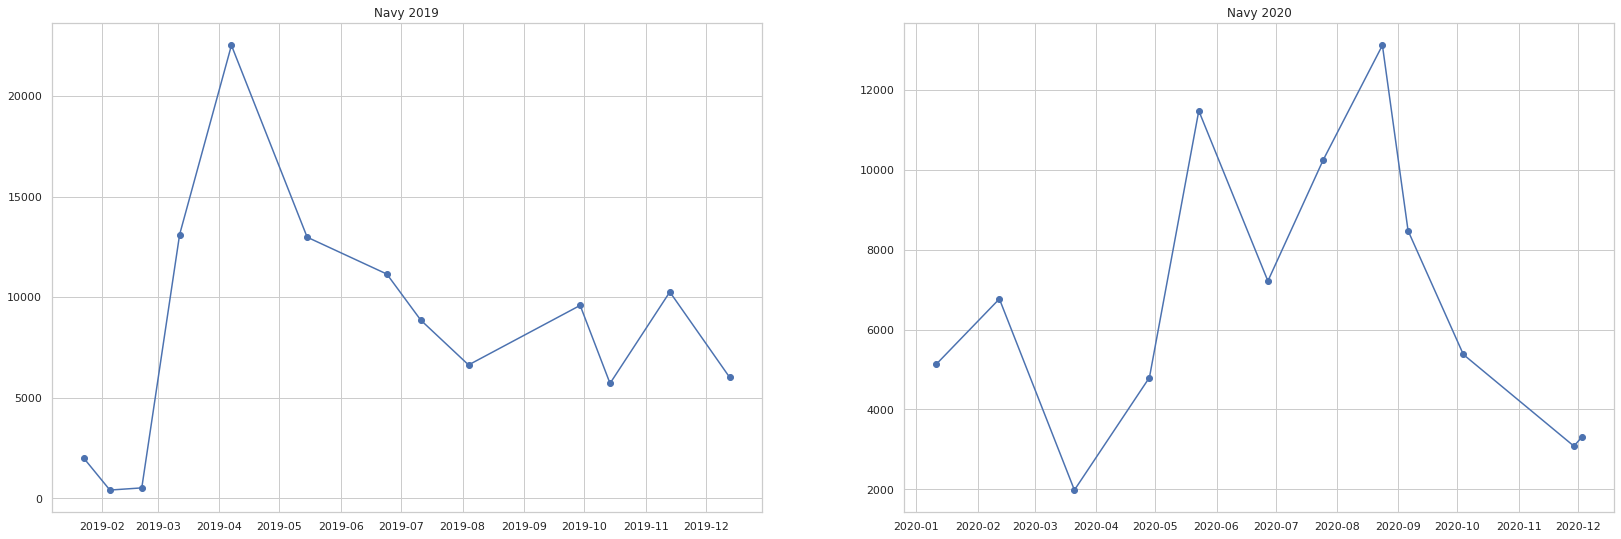

In [22]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(28, 9))
ax11 = fig.add_subplot(121)
ax12 = fig.add_subplot(122)

ax11.title.set_text('Navy 2019')
ax11.plot(x3, y3)
ax11.scatter(x3, y3)

ax12.title.set_text('Navy 2020')
ax12.plot(x4, y4)
ax12.scatter(x4, y4)

# Prediksi



In [23]:
dataset['Color'].value_counts()

NAVY             47
BLACK            30
GREY             19
BLUE             18
MULTI            13
RED              11
SAPPHIRE STAR     9
WHITE             6
GREEN             5
BAKER RED         3
MANGO             2
OLIVE             2
BLUE MIST         1
PINK              1
CREAM             1
Name: Color, dtype: int64

In [24]:
def fc(row):
    if row['Color'] =='BAKER RED':
        val = 1
    elif row['Color'] == 'BLACK' :
        val = 2
    elif row['Color'] == 'BLUE' :
        val = 3
    elif row['Color'] == 'BLUE MIST' :
        val = 4
    elif row['Color'] == 'CREAM' :
        val = 5
    elif row['Color'] == 'GREEN' :
        val = 6
    elif row['Color'] == 'GREY' :
        val = 7
    elif row['Color'] == 'MANGO' :
        val = 8
    elif row['Color'] == 'MULTI' :
        val = 9
    elif row['Color'] == 'NAVY' :
        val = 10
    elif row['Color'] == 'OLIVE' :
        val = 11
    elif row['Color'] == 'PINK' :
        val = 12
    elif row['Color'] == 'RED' :
        val = 13
    elif row['Color'] == 'SAPPHIRE STAR' :
        val = 14
    else:
        val = 15
    return val

dataset['color_int'] = dataset.apply(fc, axis=1)
dataset.head()

,Color,hsv,hue,saturation,brightness,rgb,minggu ke,Ex. Factory Date,Model Long Descriptions,PO Number,Total PO Order Qty,kelas,kelas_2,Date,Year,Month,Season,color_int
0,CREAM,"(43.99999999999994, 6.329113924050635, 92.9411...",44.00,6.329114,92.941176,[203 198 199],1,2017-07-09,ALTO VST-POLY FILL-VEST,4700613285,3798,3,3.1,2017-07-09,2017,7,2,5
1,NAVY,"(194.9999999999999, 1.5686274509803977, 100.0)",195.00,1.568627,100.000000,[81 42 28],2,2017-07-12,ALTO VST-POLY FILL-VEST,4700613285,9996,11,11.2,2017-07-12,2017,7,2,10
2,OLIVE,"(43.75, 54.54545454545454, 34.509803921568626)",43.75,54.545455,34.509804,[187 112 60],3,2017-07-23,ALTO VST-POLY FILL-VEST,4700613286,3798,3,3.1,2017-07-23,2017,7,2,11
3,BLACK,"(289.99999999999994, 9.836065573770492, 23.921...",290.00,9.836066,23.921569,[56 52 51],4,2017-07-31,FAIRWAY JKT-SYNTHETIC-JACKET,4700626516,514,17,17.1,2017-07-31,2017,7,2,2
4,BLACK,"(289.99999999999994, 9.836065573770492, 23.921...",290.00,9.836066,23.921569,[56 52 51],1,2017-08-01,FAIRWAY JKT-SYNTHETIC-JACKET,4700626517,10222,17,17.1,2017-08-01,2017,8,2,2


In [25]:
dataset['color_int'].value_counts()

10    47
2     30
7     19
3     18
9     13
13    11
14     9
15     6
6      5
1      3
11     2
8      2
12     1
5      1
4      1
Name: color_int, dtype: int64

In [26]:
# X2 dan y2 untuk model ke 2

X = dataset.drop(columns=['hsv','kelas_2','Model Long Descriptions','PO Number','rgb','Ex. Factory Date','hue','Color','Date', 'saturation', 'brightness', 'kelas', 'color_int'])
y = dataset['hue']

X2 = dataset.drop(columns=['hsv','kelas_2','Model Long Descriptions','PO Number','rgb','Ex. Factory Date','hue','Color','Date', 'saturation', 'brightness', 'kelas', 'hue', 'color_int'])
y2 = dataset['color_int']

In [27]:
print(X.columns)
print(X2.columns)
print(y)
print(y)

Index(['minggu ke', 'Total PO  Order Qty', 'Year', 'Month', 'Season'], dtype='object')
Index(['minggu ke', 'Total PO  Order Qty', 'Year', 'Month', 'Season'], dtype='object')
0       44.000000
1      195.000000
2       43.750000
3      290.000000
4      290.000000
          ...    
163    195.000000
164    195.000000
165    225.882353
166    193.176471
167      0.000000
Name: hue, Length: 168, dtype: float64
0       44.000000
1      195.000000
2       43.750000
3      290.000000
4      290.000000
          ...    
163    195.000000
164    195.000000
165    225.882353
166    193.176471
167      0.000000
Name: hue, Length: 168, dtype: float64


In [28]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, shuffle=False)


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf2 = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)
rf2.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [30]:
predictions = rf.predict(X_test)
predictions2 = rf2.predict(X_test2)

In [31]:
hasil = pd.DataFrame({'real' : y_test, 'pred' : predictions})
hasil = hasil.reset_index()

hasil2 = pd.DataFrame({'real' : y_test2, 'pred' : predictions2})
hasil2 = hasil2.reset_index()

In [32]:
hasil

,index,real,pred
0,134,0.000000,214.615289
1,135,195.000000,152.306925
2,136,225.882353,134.627127
3,137,193.176471,160.139660
4,138,195.000000,198.150048
5,139,349.940120,148.267815
6,140,290.000000,235.973041
7,141,122.535211,197.612726
8,142,0.000000,155.082867
9,143,195.000000,276.183662


In [33]:
hasil2

,index,real,pred
0,134,7,10
1,135,10,15
2,136,3,3
3,137,9,9
4,138,10,10
5,139,13,15
6,140,2,2
7,141,6,9
8,142,7,9
9,143,10,13


In [34]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test2, predictions2)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test2, predictions2))
# print('precision: {}'.format(precision))
# print('recall: {}'.format(recall))
# print('fscore: {}'.format(fscore))
# print('support: {}'.format(support))

0.3235294117647059


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
hasil['pred'] = hasil['pred'].astype(int)
hasil['real'] = hasil['real'].astype(int)

def f(row):
    if row['real'] == row['pred']:
        val = 1
    else:
        val = 0
    return val

hasil['true'] = hasil.apply(f, axis=1)
hasil.head()


,index,real,pred,true
0,134,0,214,0
1,135,194,152,0
2,136,225,134,0
3,137,193,160,0
4,138,194,198,0


In [36]:
hasil2['pred'] = hasil2['pred'].astype(int)
hasil2['real'] = hasil2['real'].astype(int)

def f(row):
    if row['real'] == row['pred']:
        val = 1
    else:
        val = 0
    return val

hasil2['true'] = hasil2.apply(f, axis=1)
hasil2.head()


,index,real,pred,true
0,134,7,10,0
1,135,10,15,0
2,136,3,3,1
3,137,9,9,1
4,138,10,10,1


In [37]:
print(hasil2['true'].value_counts().sort_index())

counts = hasil2['true'].value_counts().tolist()
benar = counts[1]
salah = counts[0]
jumlah = benar + salah

Accuracy = (benar/jumlah) * 100
print('Accuracy : ', round(Accuracy,2), '%')


0    23
1    11
Name: true, dtype: int64
Accuracy :  32.35 %


In [38]:
hasil = hasil.reset_index()
hasil.to_excel('hasil.xlsx', index=False)

In [39]:
print(hasil['true'].value_counts())

counts = hasil['true'].value_counts().tolist()
benar = counts[0]
salah = counts[1]
jumlah = benar + salah

Accuracy = (benar/jumlah) * 100
print('Accuracy : ', round(Accuracy,2), '%')


0    34
Name: true, dtype: int64


IndexError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, predictions, squared=False)

#print(round(rmse,2),'%')
print(round(rmse,2))
print(rmse)

**dnn**

In [ ]:
# import numpy as np
# from keras.layers import Dense, Activation
# from keras.models import Sequential
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

# # Splitting the dataset into the Training set and Test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.08, random_state = 0)

# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# # Initialising the ANN
# model = Sequential()

# # Adding the input layer and the first hidden layer
# model.add(Dense(32, activation = 'relu', input_dim = 6))

# # Adding the second hidden layer
# model.add(Dense(units = 32, activation = 'relu'))

# # Adding the third hidden layer
# model.add(Dense(units = 32, activation = 'relu'))

# # Adding the output layer
# model.add(Dense(units = 1))

# #model.add(Dense(1))
# # Compiling the ANN
# model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# # Fitting the ANN to the Training set
# model.fit(X_train, y_train, batch_size = 10, epochs = 100)

# y_pred = model.predict(X_test)

# plt.plot(y_test, color = 'red', label = 'Real data')
# plt.plot(y_pred, color = 'blue', label = 'Predicted data')
# plt.title('Prediction')
# plt.legend()
# plt.show()

# Neural Network


In [41]:
"""
 NeuralNetwork.py  (author: Anson Wong / git: ankonzoid)
"""
import math, random
import numpy as np

class NN:

    def __init__(self, input_dim=None, output_dim=None, hidden_layers=None, seed=1):
        if (input_dim is None) or (output_dim is None) or (hidden_layers is None):
            raise Exception("Invalid arguments given!")
        self.input_dim = input_dim # number of input nodes
        self.output_dim = output_dim # number of output nodes
        self.hidden_layers = hidden_layers # number of hidden nodes @ each layer
        self.network = self._build_network(seed=seed)

    # Train network
    def train(self, X, y, eta=0.5, n_epochs=200):
        for epoch in range(n_epochs):
            for (x_, y_) in zip(X, y):
                self._forward_pass(x_) # forward pass (update node["output"])
                yhot_ = self._one_hot_encoding(y_, self.output_dim) # one-hot target
                self._backward_pass(yhot_) # backward pass error (update node["delta"])
                self._update_weights(x_, eta) # update weights (update node["weight"])

    # Predict using argmax of logits
    def predict(self, X):
        ypred = np.array([np.argmax(self._forward_pass(x_)) for x_ in X], dtype=np.int)
        return ypred

    # ==============================
    #
    # Internal functions
    #
    # ==============================

    # Build fully-connected neural network (no bias terms)
    def _build_network(self, seed=1):
        random.seed(seed)

        # Create a single fully-connected layer
        def _layer(input_dim, output_dim):
            layer = []
            for i in range(output_dim):
                weights = [random.random() for _ in range(input_dim)] # sample N(0,1)
                node = {"weights": weights, # list of weights
                        "output": None, # scalar
                        "delta": None} # scalar
                layer.append(node)
            return layer

        # Stack layers (input -> hidden -> output)
        network = []
        if len(self.hidden_layers) == 0:
            network.append(_layer(self.input_dim, self.output_dim))
        else:
            network.append(_layer(self.input_dim, self.hidden_layers[0]))
            for i in range(1, len(self.hidden_layers)):
                network.append(_layer(self.hidden_layers[i-1], self.hidden_layers[i]))
            network.append(_layer(self.hidden_layers[-1], self.output_dim))

        return network

    # Forward-pass (updates node['output'])
    def _forward_pass(self, x):
        transfer = self._sigmoid
        x_in = x
        for layer in self.network:
            x_out = []
            for node in layer:
                node['output'] = transfer(self._dotprod(node['weights'], x_in))
                x_out.append(node['output'])
            x_in = x_out # set output as next input
        return x_in

    # Backward-pass (updates node['delta'], L2 loss is assumed)
    def _backward_pass(self, yhot):
        transfer_derivative = self._sigmoid_derivative # sig' = f(sig)
        n_layers = len(self.network)
        for i in reversed(range(n_layers)): # traverse backwards
            if i == n_layers - 1:
                # Difference between logits and one-hot target
                for j, node in enumerate(self.network[i]):
                    err = node['output'] - yhot[j]
                    node['delta'] = err * transfer_derivative(node['output'])
            else:
                # Weighted sum of deltas from upper layer
                for j, node in enumerate(self.network[i]):
                    err = sum([node_['weights'][j] * node_['delta'] for node_ in self.network[i+1]])
                    node['delta'] = err * transfer_derivative(node['output'])

    # Update weights (updates node['weight'])
    def _update_weights(self, x, eta):
        for i, layer in enumerate(self.network):
            # Grab input values
            if i == 0: inputs = x
            else: inputs = [node_['output'] for node_ in self.network[i-1]]
            # Update weights
            for node in layer:
                for j, input in enumerate(inputs):
                    # dw = - learning_rate * (error * transfer') * input
                    node['weights'][j] += - eta * node['delta'] * input

    # Dot product
    def _dotprod(self, a, b):
        return sum([a_ * b_ for (a_, b_) in zip(a, b)])

    # Sigmoid (activation function)
    def _sigmoid(self, x):
        return 1.0/(1.0+math.exp(-x))

    # Sigmoid derivative
    def _sigmoid_derivative(self, sigmoid):
        return sigmoid*(1.0-sigmoid)

    # One-hot encoding
    def _one_hot_encoding(self, idx, output_dim):
        x = np.zeros(output_dim, dtype=np.int)
        x[idx] = 1
        return x

In [40]:
'''
 NN_scratch.py  (author: Anson Wong / git: ankonzoid)
 We train a multi-layer fully-connected neural network from scratch to classify
 the seeds dataset (https://archive.ics.uci.edu/ml/datasets/seeds). An L2 loss
 function, sigmoid activation, and no bias terms are assumed. The weight
 optimization is gradient descent via the delta rule.
'''
import numpy as np
from src.NN import NN
import src.utils as utils

# Settings
csv_filename = "/content/seeds_dataset.csv"
hidden_layers = [5] # number of nodes in hidden layers i.e. [layer1, layer2, ...]
eta = 0.1 # learning rate
n_epochs = 400 # number of training epochs
n_folds = 4 # number of folds for cross-validation
seed_crossval = 1 # seed for cross-validation
seed_weights = 1 # seed for NN weight initialization

# Read csv data + normalize features
print("Reading '{}'...".format(csv_filename))
X, y, n_classes = utils.read_csv(csv_filename, target_name="y", normalize=True)
print(" -> X.shape = {}, y.shape = {}, n_classes = {}\n".format(X.shape, y.shape, n_classes))
N, d = X.shape

print("Neural network model:")
print(" input_dim = {}".format(d))
print(" hidden_layers = {}".format(hidden_layers))
print(" output_dim = {}".format(n_classes))
print(" eta = {}".format(eta))
print(" n_epochs = {}".format(n_epochs))
print(" n_folds = {}".format(n_folds))
print(" seed_crossval = {}".format(seed_crossval))
print(" seed_weights = {}\n".format(seed_weights))

# Create cross-validation folds
idx_all = np.arange(0, N)
idx_folds = utils.crossval_folds(N, n_folds, seed=seed_crossval) # list of list of fold indices

# Train/evaluate the model on each fold
acc_train, acc_valid = list(), list()
print("Cross-validating with {} folds...".format(len(idx_folds)))
for i, idx_valid in enumerate(idx_folds):

    # Collect training and test data from folds
    idx_train = np.delete(idx_all, idx_valid)
    X_train, y_train = X[idx_train], y[idx_train]
    X_valid, y_valid = X[idx_valid], y[idx_valid]

    # Build neural network classifier model and train
    model = NN(input_dim=d, output_dim=n_classes,
               hidden_layers=hidden_layers, seed=seed_weights)
    model.train(X_train, y_train, eta=eta, n_epochs=n_epochs)

    # Make predictions for training and test data
    ypred_train = model.predict(X_train)
    ypred_valid = model.predict(X_valid)

    # Compute training/test accuracy score from predicted values
    acc_train.append(100*np.sum(y_train==ypred_train)/len(y_train))
    acc_valid.append(100*np.sum(y_valid==ypred_valid)/len(y_valid))

    # Print cross-validation result
    print(" Fold {}/{}: acc_train = {:.2f}%, acc_valid = {:.2f}% (n_train = {}, n_valid = {})".format(
        i+1, n_folds, acc_train[-1], acc_valid[-1], len(X_train), len(X_valid)))

# Print results
print("  -> acc_train_avg = {:.2f}%, acc_valid_avg = {:.2f}%".format(
    sum(acc_train)/float(len(acc_train)), sum(acc_valid)/float(len(acc_valid))))

ModuleNotFoundError: ignored